In [30]:
import glob
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
imgs = glob.glob("trackresimleri/*.png")

In [32]:
width = 125
height = 50

X = []
Y = []

for img in imgs:
    
    filename = os.path.basename(img)
    label = filename.split("_")[0]
    im = np.array(Image.open(img).convert("L").resize((width,height)))
    im = im/255
    X.append(im)
    Y.append(label)
    
X = np.array(X)
X = X.reshape(X.shape[0],width,height,1)

<AxesSubplot:ylabel='count'>

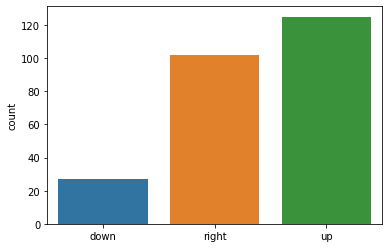

In [21]:
sns.countplot(Y)

In [33]:
def onehot_labels(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse = False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

Y = onehot_labels(Y)
train_X, test_X, train_y, test_y =  train_test_split(X, Y, test_size=0.25, random_state = 2)

## CNN Model


In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (width,height,1)))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(3,activation="softmax"))




model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

model.fit(train_X, train_y, epochs= 35, batch_size = 64)

score_train = model.evaluate(train_X, train_y)
print("Eğitim Doğrulu : %",score_train[1]*100)

score_test = model.evaluate(test_X, test_y)
print("Test doğruluğu: %", score_test[1]*100)
open("model_json","w").write(model.to_json())
model.save_weights("trex_weight.h5")



Epoch 1/35
3/3 [==============================] - 3s 648ms/step - loss: 4.7337 - accuracy: 0.4526
Epoch 2/35
3/3 [==============================] - 2s 633ms/step - loss: 1.9565 - accuracy: 0.4474
Epoch 3/35
3/3 [==============================] - 2s 632ms/step - loss: 1.1593 - accuracy: 0.4105
Epoch 4/35
3/3 [==============================] - 2s 657ms/step - loss: 0.9518 - accuracy: 0.5211
Epoch 5/35
3/3 [==============================] - 2s 623ms/step - loss: 0.9431 - accuracy: 0.5158
Epoch 6/35
3/3 [==============================] - 2s 636ms/step - loss: 0.8665 - accuracy: 0.5421
Epoch 7/35
3/3 [==============================] - 2s 623ms/step - loss: 0.8802 - accuracy: 0.5053
Epoch 8/35
3/3 [==============================] - 2s 661ms/step - loss: 0.8286 - accuracy: 0.5947
Epoch 9/35
3/3 [==============================] - 2s 670ms/step - loss: 0.7828 - accuracy: 0.6316
Epoch 10/35
3/3 [==============================] - 2s 638ms/step - loss: 0.7765 - accuracy: 0.6211
Epoch 11/35
3/3 [==